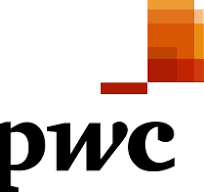

# 📊 Telecom Customer Churn Analysis – PwC Consulting Case Study

## **📌 Background**
The telecom industry is highly competitive, and customers frequently switch providers for better pricing, improved service quality, or enhanced customer experience. The company is losing a significant percentage of customers every month, affecting revenue and profitability. The CEO wants to understand:

- Who are the customers that are churning?
- What factors contribute to churn the most?
- How can the company proactively predict and prevent churn?

--> My task is to conducting an exploratory data analysis (EDA) on customer demographics and behaviors, followed by building a churn prediction model to identify key risk factors leading to customer churn.

---

# 1. Import the data

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn-Dataset.csv')

# 2. Data preparation & Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [5]:
df['Churn'] = df['Churn'].apply(lambda x:1 if x.lower() == 'yes' else 0 )

In [6]:
change_cols = ['Partner', 'Dependents', 'PaperlessBilling']
for col in change_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [7]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,No,No,One year,0,Mailed check,56.95,1889.5,0,0,0
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,0,0,1
3,7795-CFOCW,1,0,0,0,45,No,No phone service,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,3,0
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,0,0,1
5,9305-CDSKC,0,0,0,0,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.5,0,0,1
6,1452-KIOVK,1,0,0,1,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,0,0
7,6713-OKOMC,0,0,0,0,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,0,Mailed check,29.75,301.9,0,0,0
8,7892-POOKP,0,0,1,0,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,0,2,1
9,6388-TABGU,1,0,0,1,62,Yes,No,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0,0,0


# 3. Exploratory Data Analysis

## **Basic Stats**

In [8]:
#check basic statistics
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,numAdminTickets,numTechTickets,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,0.515689,0.419566,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,1.275299,1.250117,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,5.000000,9.000000,1.000000


In [23]:
churned_df = df[df['Churn'] == 1]

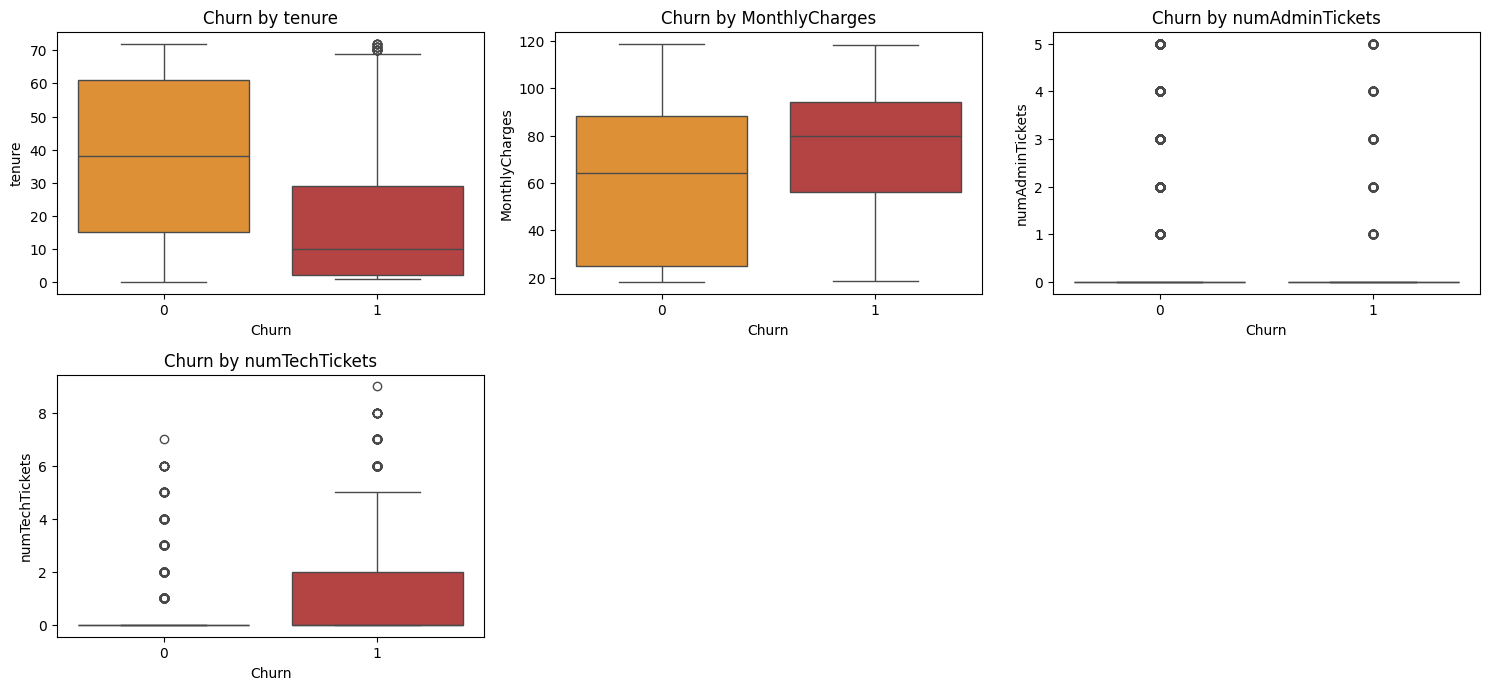

In [ ]:
# Numerical variables - compare distributions
numerical_cols = ['tenure', 'MonthlyCharges', 'numAdminTickets',
                 'numTechTickets']
palette = {'1': '#c73030', '0': '#fa921b'}
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=column, data=df, palette =palette)
    plt.title(f'Churn by {column}')
plt.tight_layout()
plt.show()


In [10]:
# List of categorical columns
categorical_cols = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'Contract', 'PaymentMethod' ]

# Display frequency counts for each categorical column
for col in categorical_cols:
    print(f"Frequency counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Frequency counts for Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64


Frequency counts for gender:
gender
1    3555
0    3488
Name: count, dtype: int64


Frequency counts for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Frequency counts for Partner:
Partner
0    3641
1    3402
Name: count, dtype: int64


Frequency counts for Dependents:
Dependents
0    4933
1    2110
Name: count, dtype: int64


Frequency counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Frequency counts for PaperlessBilling:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


Frequency counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Frequency counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Frequency counts for OnlineSecurity:
OnlineSecurity
No     

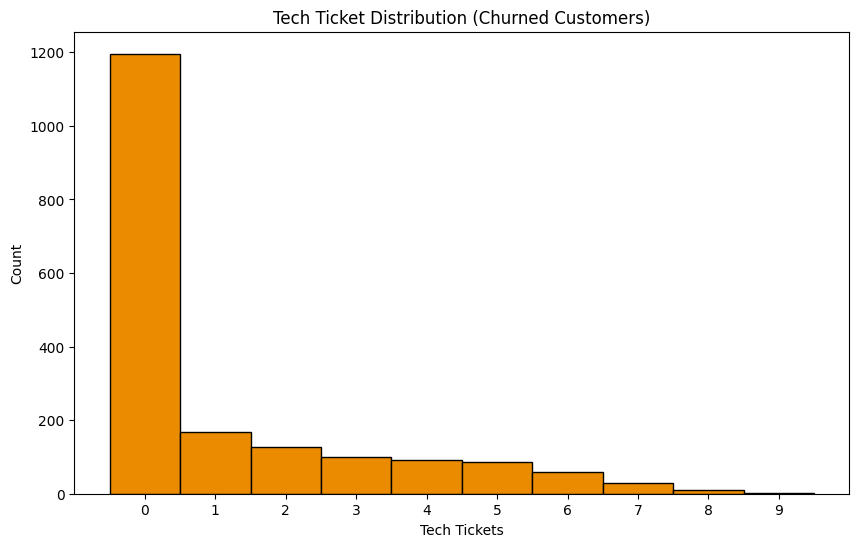

In [24]:
plt.figure(figsize=(10,6))
# Create histogram data
counts, bins, patches = plt.hist(churned_df["numTechTickets"],
                                 bins=range(int(churned_df["numTechTickets"].max()) + 2),
                                 edgecolor="black", color="#eb8c00")

# Set x-axis labels to be centered in each bin
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.xticks(bin_centers, labels=[str(int(b)) for b in bin_centers])

# Labels and title
plt.xlabel("Tech Tickets")
plt.ylabel("Count")
plt.title("Tech Ticket Distribution (Churned Customers)")

# Show the plot
plt.show()


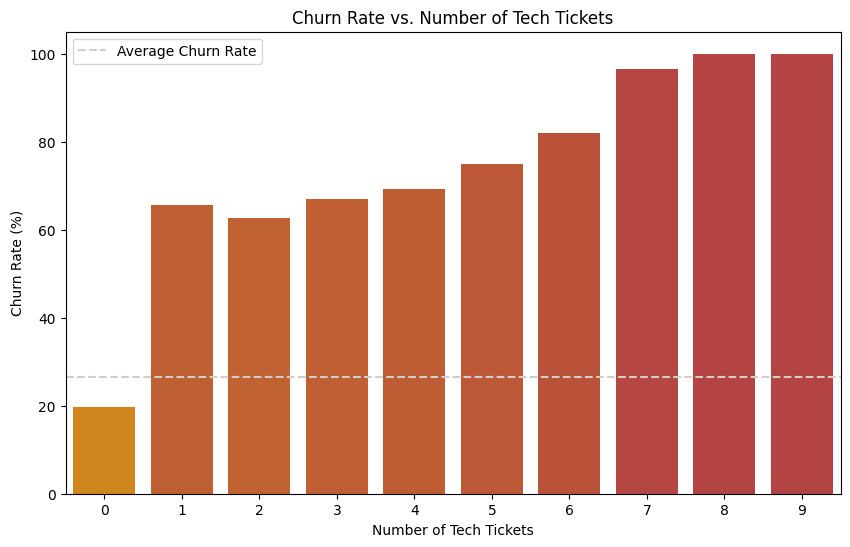

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import seaborn as sns

# 1. Group by numTechTickets and calculate churn rate
churn_rate_by_ticket = df.groupby("numTechTickets")["Churn"].mean().mul(100).reset_index()
churn_rate_by_ticket.rename(columns={"Churn": "Churn_Rate"}, inplace=True)

# 2. Create a custom gradient scale
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_gradient",
    ['#eb8c00', '#c73030']
)

# 3. Normalize churn rate values for color mapping
norm = Normalize(vmin=churn_rate_by_ticket['Churn_Rate'].min(),
                 vmax=churn_rate_by_ticket['Churn_Rate'].max())

# 4. Map churn rates to bar colors
bar_colors = [custom_cmap(norm(val)) for val in churn_rate_by_ticket["Churn_Rate"]]

# 5. Plot with custom gradient
plt.figure(figsize=(10, 6))
sns.barplot(x="numTechTickets", y="Churn_Rate", data=churn_rate_by_ticket, palette=bar_colors)

plt.xlabel("Number of Tech Tickets")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate vs. Number of Tech Tickets")
plt.axhline(y=df['Churn'].mean()*100, color='#d1cdcd', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.show()

# 4. Churn Analysis

In [11]:
overall_churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.54%


In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [13]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

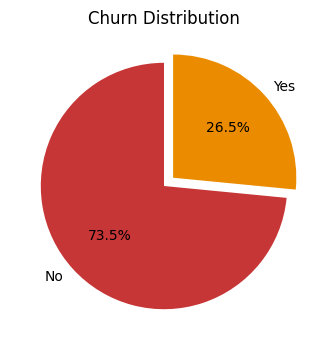

In [ ]:
churn_counts = df['Churn'].value_counts()
churn_labels = {0: 'No', 1: 'Yes'}

# Define explode 
explode = (0, 0.1)

# Get values in correct order
values = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
labels = ['No', 'Yes']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#c73636','#eb8c00'],
        explode=explode)
plt.title('Churn Distribution')
plt.show()

# **4.1 Customer demographic**

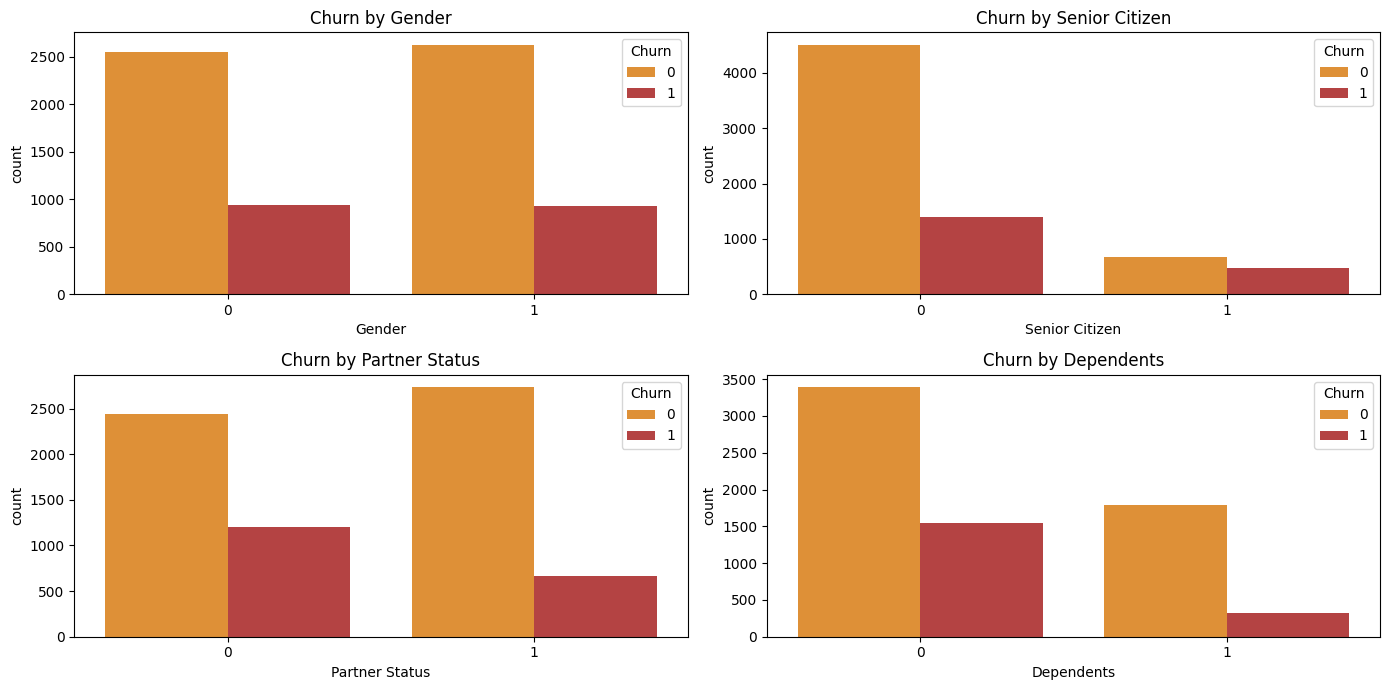

In [27]:
churn_palette = {1: '#c73030', 0: '#fa921b'}
plt.figure(figsize=(14, 7))

# Subplot 1: Churn by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='gender', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('Gender')
plt.title('Churn by Gender')

# Subplot 2: Churn by Senior Citizen
plt.subplot(2, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('Senior Citizen')
plt.title('Churn by Senior Citizen')

# Subplot 3: Churn by Partner Status
plt.subplot(2, 2, 3)
sns.countplot(x='Partner', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('Partner Status')
plt.title('Churn by Partner Status')

# Subplot 4: Churn by Dependents
plt.subplot(2, 2, 4)
sns.countplot(x='Dependents', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('Dependents')
plt.title('Churn by Dependents')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Churn by Tenure')

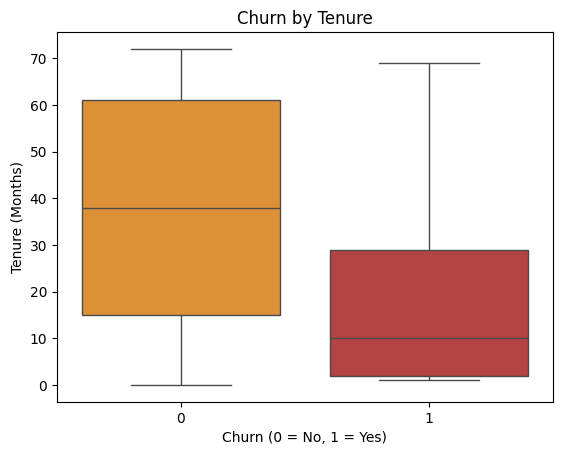

In [28]:
palette = {'0': '#fa921b', '1': '#c73030'}
sns.boxplot(x = 'Churn',
            y = 'tenure',
            data = df,
            fliersize = 0,
            palette=palette)

plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.title("Churn by Tenure")


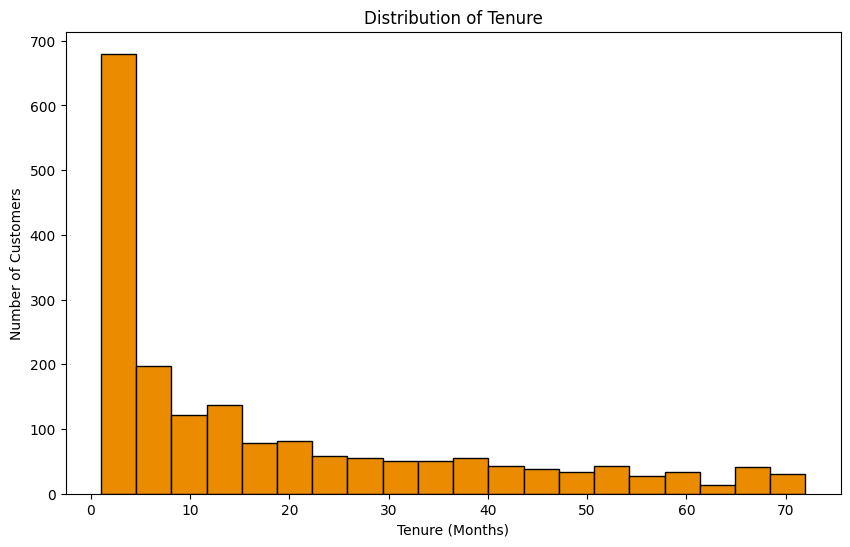

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(churned_df['tenure'], bins=20, color="#eb8c00", edgecolor="black")

plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

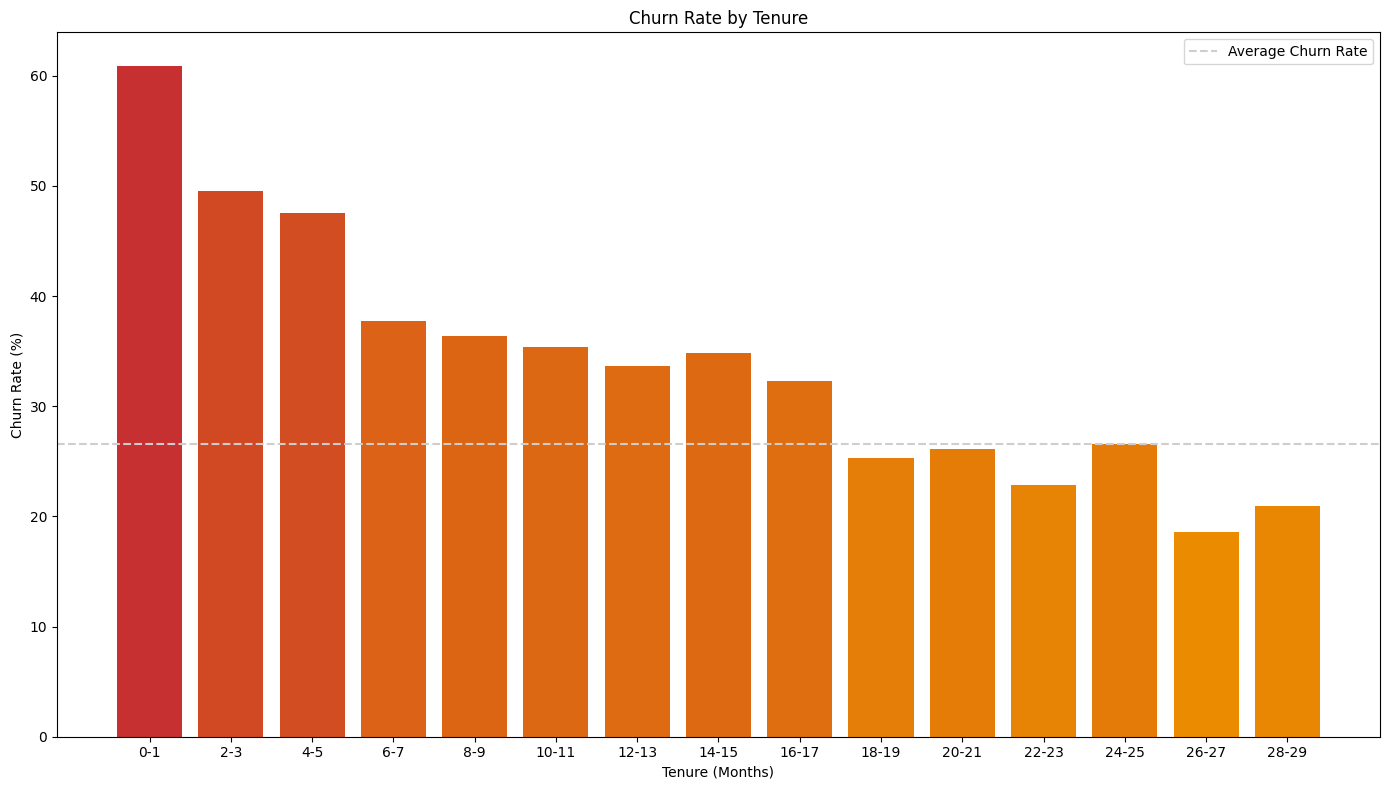

In [ ]:
# Bin the tenure values
bins = range(0, 31, 2)  # 0 to 30 months, step 2
labels = [f'{i}-{i+1}' for i in bins[:-1]]
df_tenure = df.copy()
df_tenure['tenure_bin'] = pd.cut(df_tenure['tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate per tenure bin
churn_rate_by_tenure = df_tenure.groupby('tenure_bin')['Churn'].mean().reset_index()
churn_rate_by_tenure.rename(columns={'Churn': 'Churn_Rate'}, inplace=True)

# Create gradient colors
norm = Normalize(vmin=churn_rate_by_tenure['Churn_Rate'].min(), vmax=churn_rate_by_tenure['Churn_Rate'].max())
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#eb8c00', '#c73030'])
bar_colors = [custom_cmap(norm(rate)) for rate in churn_rate_by_tenure['Churn_Rate']]

# Plot
plt.figure(figsize=(14, 8))
plt.bar(churn_rate_by_tenure['tenure_bin'], churn_rate_by_tenure['Churn_Rate'] * 100, color=bar_colors)

plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')
plt.xticks(rotation=0, ha='center')
plt.axhline(y=df['Churn'].mean()*100, color='#d1cdcd', linestyle='--', label='Average Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()


# **4.2 Service usage and Billings**

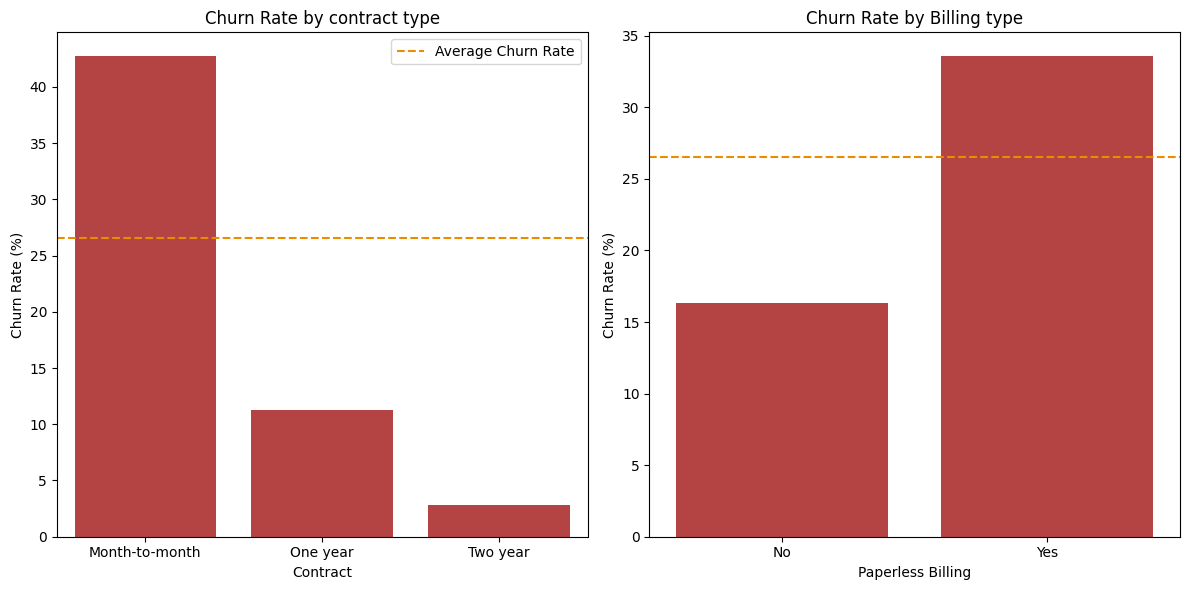

In [31]:
# Calculate churn rate by contract
contract_churn = df.groupby('Contract')['Churn'].agg(['mean', 'count'])
contract_churn['churn_rate'] = contract_churn['mean'] * 100
contract_churn = contract_churn.sort_values('churn_rate', ascending=False)

# Calculate churn rate by billing types
bill_churn = df.groupby('PaperlessBilling')['Churn'].agg(['mean', 'count'])
bill_churn['churn_rate'] = bill_churn['mean'] * 100
bill_churn = bill_churn.sort_values('churn_rate', ascending=False)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=contract_churn.index, y='churn_rate', data=contract_churn, color = '#c73030')
plt.title('Churn Rate by contract type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract')
plt.xticks(rotation=0)
plt.axhline(y=df['Churn'].mean()*100, color="#eb8c00", linestyle='--', label='Average Churn Rate')
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(x=bill_churn.index, y='churn_rate', data=bill_churn, color = '#c73030')
plt.title('Churn Rate by Billing type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Paperless Billing')
plt.xticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.axhline(y=df['Churn'].mean()*100, color="#eb8c00", linestyle='--', label='Average Churn Rate')

plt.tight_layout()
plt.show()



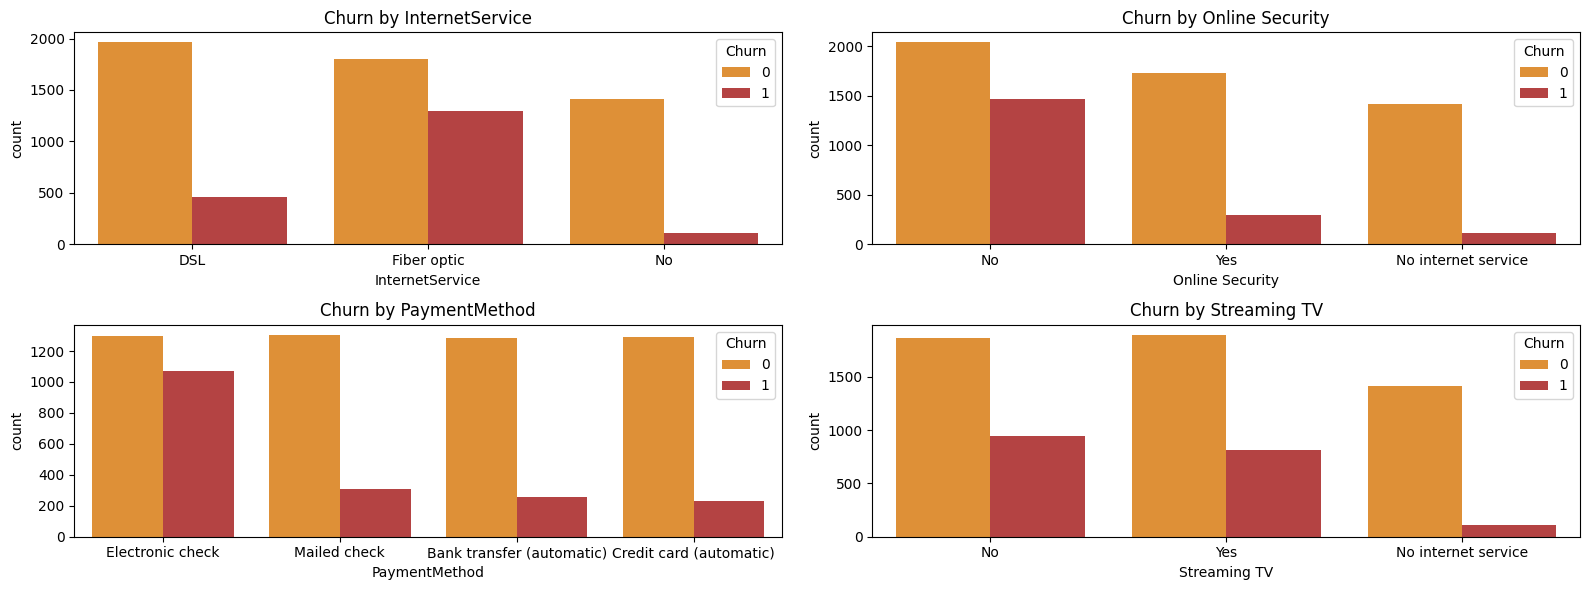

In [32]:
churn_palette = {1: '#c73030', 0: '#fa921b'}
# Plot categorical relationships
plt.figure(figsize=(16, 6))

# Churn by Internet Service
plt.subplot(2, 2, 1)
sns.countplot(x='InternetService', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('InternetService')
plt.title('Churn by InternetService')

# Churn by OnlineSecurity
plt.subplot(2, 2, 2)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('Online Security')
plt.title('Churn by Online Security')

# Churn by Payment Method
plt.subplot(2, 2, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('PaymentMethod')
plt.title('Churn by PaymentMethod')

# Churn by Streaming TV
plt.subplot(2, 2, 4)
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette =churn_palette)
plt.xlabel('Streaming TV')
plt.title('Churn by Streaming TV')

plt.tight_layout()
plt.show()

In [33]:
# Group by InternetService and calculate churn rate
churn_rate_by_internetService = df.groupby("InternetService")["Churn"].mean().mul(100).reset_index()
churn_rate_by_internetService.rename(columns={"Churn": "Churn_Rate"}, inplace=True)

# Group by paymentmethod and calculate churn rate
churn_rate_by_PaymentMethod = df.groupby("PaymentMethod")["Churn"].mean().mul(100).reset_index()
churn_rate_by_PaymentMethod.rename(columns={"Churn": "Churn_Rate"}, inplace=True)

Text(0.5, 1.0, 'Churn by Payment Method')

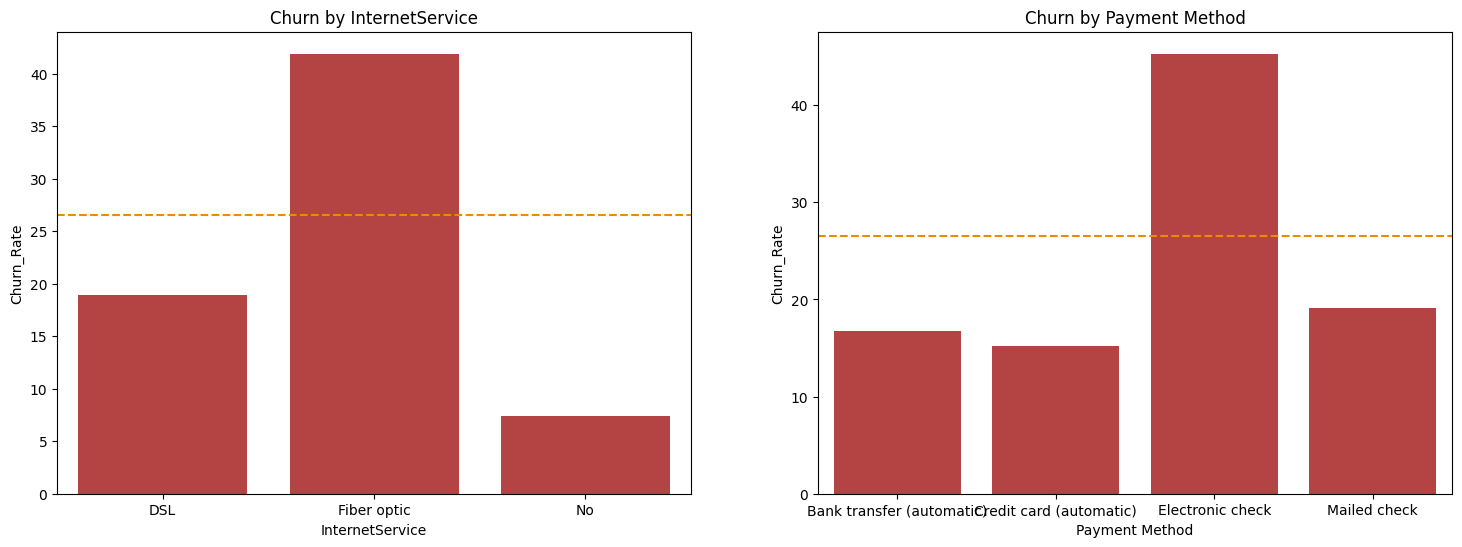

In [34]:
plt.figure(figsize=(18, 6))
# Churn by Internet Service
plt.subplot(1, 2, 1)
sns.barplot(x='InternetService', y='Churn_Rate', data=churn_rate_by_internetService, color = '#c73030')
plt.xlabel('InternetService')
plt.axhline(y=df['Churn'].mean()*100, color="#eb8c00", linestyle='--', label='Average Churn Rate')
plt.title('Churn by InternetService')

# Churn by paymentmethod
plt.subplot(1, 2, 2)
sns.barplot(x='PaymentMethod',y='Churn_Rate', data=churn_rate_by_PaymentMethod, color = '#c73030')
plt.xlabel('Payment Method')
plt.axhline(y=df['Churn'].mean()*100, color="#eb8c00", linestyle='--', label='Average Churn Rate')
plt.title('Churn by Payment Method')

# 5. Feature Correlations












In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

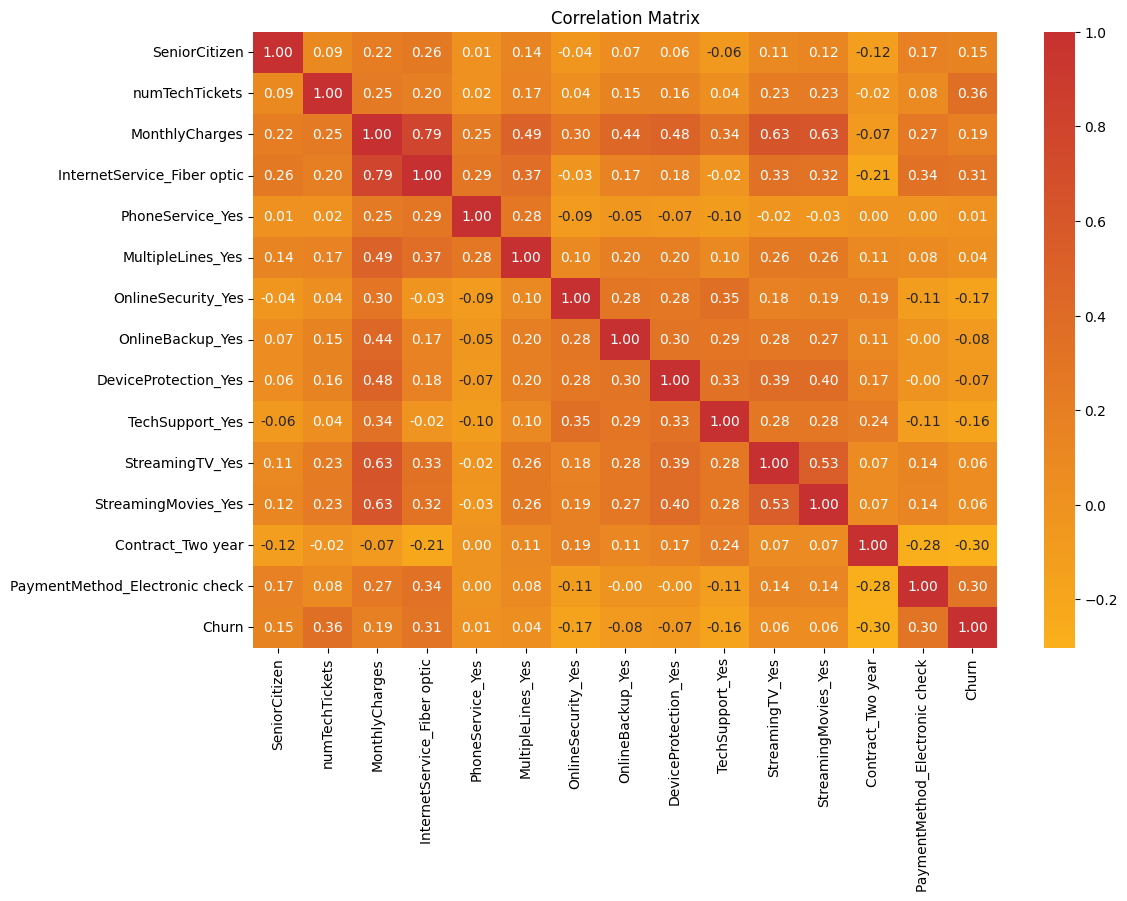

In [48]:
custom_cmap = LinearSegmentedColormap.from_list("custom", ['#fab01b', '#c73030'])
correlation = df.drop(['TotalCharges', 'customerID'], axis=1)
#Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(correlation, drop_first=True)

#select relevant binary columns
selected_columns = [
    'SeniorCitizen_Yes' if 'SeniorCitizen_Yes' in df_encoded else 'SeniorCitizen',
    'numTechTickets',
    'MonthlyCharges',
    'InternetService_Fiber optic' if 'InternetService_Fiber optic' in df_encoded else 'InternetService',
    'PhoneService_Yes' if 'PhoneService_Yes' in df_encoded else 'PhoneService',
    'MultipleLines_Yes' if 'MultipleLines_Yes' in df_encoded else 'MultipleLines',
    'OnlineSecurity_Yes' if 'OnlineSecurity_Yes' in df_encoded else 'OnlineSecurity',
    'OnlineBackup_Yes' if 'OnlineBackup_Yes' in df_encoded else 'OnlineBackup',
    'DeviceProtection_Yes' if 'DeviceProtection_Yes' in df_encoded else 'DeviceProtection',
    'TechSupport_Yes' if 'TechSupport_Yes' in df_encoded else 'TechSupport',
    'StreamingTV_Yes' if 'StreamingTV_Yes' in df_encoded else 'StreamingTV',
    'StreamingMovies_Yes' if 'StreamingMovies_Yes' in df_encoded else 'StreamingMovies',
    'Contract_Two year' if 'Contract_Two year' in df_encoded else 'Contract',
    'PaymentMethod_Electronic check' if 'PaymentMethod_Electronic check' in df_encoded else 'PaymentMethod',
    'Churn_Yes' if 'Churn_Yes' in df_encoded else 'Churn'
]

selected_columns = [col for col in selected_columns if col in df_encoded.columns]
correlation_matrix = df_encoded[selected_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

# 6. Feature Engineering

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
print(df_encoded[numerical_columns].describe())

             tenure  MonthlyCharges
count  7.043000e+03    7.043000e+03
mean  -2.421273e-17   -6.406285e-17
std    1.000071e+00    1.000071e+00
min   -1.318165e+00   -1.545860e+00
25%   -9.516817e-01   -9.725399e-01
50%   -1.372744e-01    1.857327e-01
75%    9.214551e-01    8.338335e-01
max    1.613701e+00    1.794352e+00


In [38]:
df_encoded['TotalServicesUsed'] = df_encoded[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'StreamingTV_Yes',
                                              'StreamingMovies_Yes', 'TechSupport_Yes', 'DeviceProtection_Yes']].sum(axis=1)

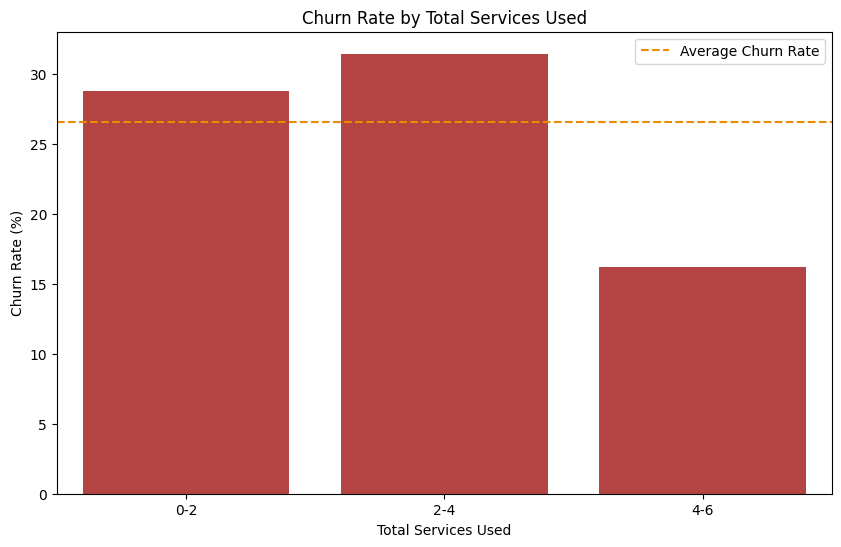

In [ ]:

# Define function to categorize TotalServicesUsed into bins
def categorize_services_used(value):
    if 0 <= value < 2:
        return '0-2'
    elif 2 <= value < 4:
        return '2-4'
    elif 4 <= value <= 6:
        return '4-6'
    else:
        return 'Other'  # Just in case there are values outside the defined range

# Create a temporary column for visualization (without modifying the dataset)
df_temp = df_encoded.copy()
df_temp['TotalServicesUsed_bin_temp'] = df_temp['TotalServicesUsed'].apply(categorize_services_used)

# Calculate churn rate for each bin
churn_rate_by_service_bin = df_temp.groupby('TotalServicesUsed_bin_temp')['Churn'].mean().mul(100).reset_index()
churn_rate_by_service_bin.rename(columns={'Churn': 'Churn_Rate'}, inplace=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalServicesUsed_bin_temp', y='Churn_Rate', data=churn_rate_by_service_bin, color='#c73030')

# Labels and title
plt.xlabel('Total Services Used')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Total Services Used')

# Add average churn rate line
plt.axhline(y=df_encoded['Churn'].mean() * 100, color="#eb8c00", linestyle='--', label='Average Churn Rate')

# Show plot
plt.legend()
plt.show()

# 7. Modelling


In [40]:
df_encoded.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,numAdminTickets,numTechTickets,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalServicesUsed
0,0,0,1,0,-1.277445,1,-1.160323,0,0,0,...,False,False,False,False,False,False,False,True,False,1
1,1,0,0,0,0.066327,0,-0.259629,0,0,0,...,False,False,False,False,True,False,False,False,True,2
2,1,0,0,0,-1.236724,1,-0.362660,0,0,1,...,False,False,False,False,False,False,False,False,True,2
3,1,0,0,0,0.514251,0,-0.746535,0,3,0,...,False,False,False,False,True,False,False,False,False,3
4,0,0,0,0,-1.236724,1,0.197365,0,0,1,...,False,False,False,False,False,False,False,True,False,0


 # *7.1. Logistic Regression*


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = pd.get_dummies(df_encoded.drop(columns=['Churn']), drop_first=True)
y = df_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1389  150]
 [ 152  422]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1539
           1       0.74      0.74      0.74       574

    accuracy                           0.86      2113
   macro avg       0.82      0.82      0.82      2113
weighted avg       0.86      0.86      0.86      2113



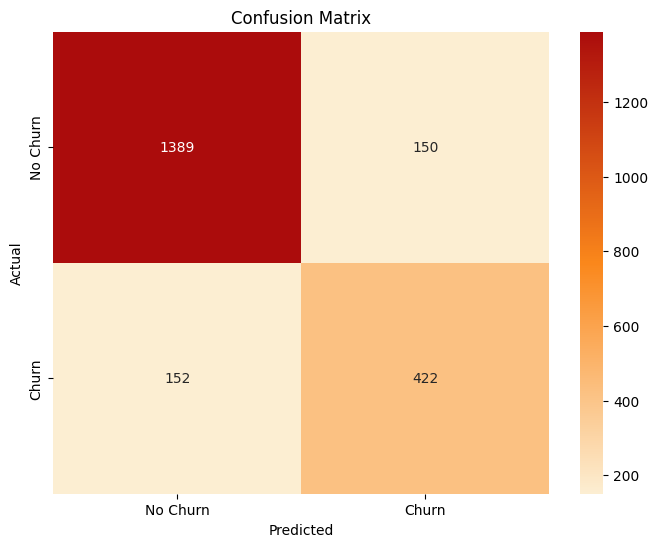

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
custom_cmap = LinearSegmentedColormap.from_list("custom", ['#fceed2', '#fa871b', '#ab0c0c'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 # *7.2. Decision Tree*

Decision Tree - Confusion Matrix:
[[1343  196]
 [ 189  385]]

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1539
           1       0.66      0.67      0.67       574

    accuracy                           0.82      2113
   macro avg       0.77      0.77      0.77      2113
weighted avg       0.82      0.82      0.82      2113



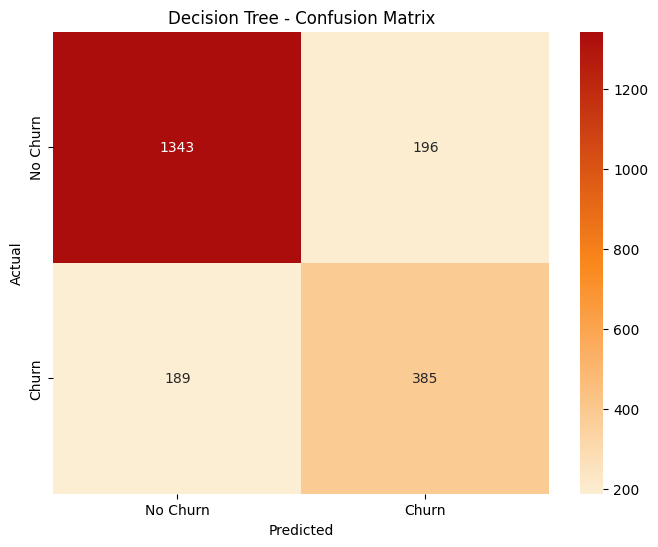

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))
print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dtree))

# Compute the confusion matrix for Decision Tree
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
custom_cmap = LinearSegmentedColormap.from_list("custom", ['#fceed2', '#fa871b', '#ab0c0c'])
# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

 # *7.3. Random Forest*

Random Forest - Confusion Matrix:
[[1393  146]
 [ 178  396]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1539
           1       0.73      0.69      0.71       574

    accuracy                           0.85      2113
   macro avg       0.81      0.80      0.80      2113
weighted avg       0.84      0.85      0.85      2113



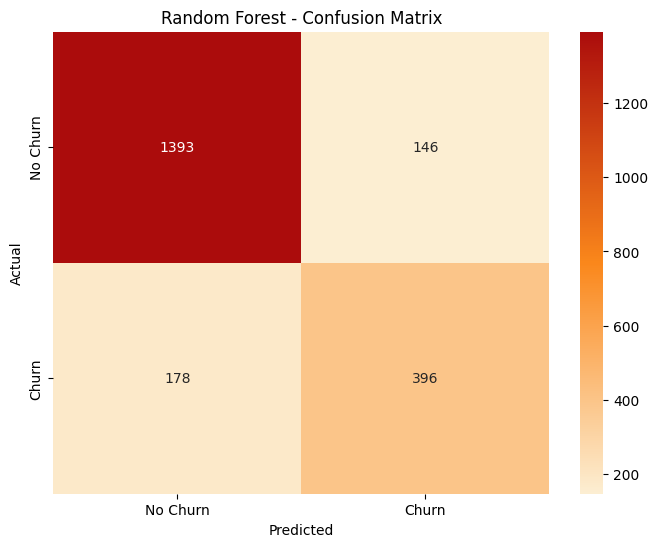

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42) # You can adjust n_estimators

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Compute the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
custom_cmap = LinearSegmentedColormap.from_list("custom", ['#fceed2', '#fa871b', '#ab0c0c'])
# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()
